In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf

In [3]:
mnist = tf.keras.datasets.mnist

In [4]:
(x_train, y_train),(x_test, y_test) = mnist.load_data() 

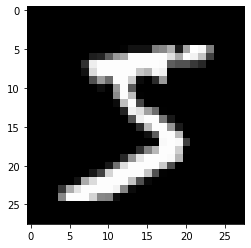

In [5]:
plt.imshow(x_train[0], cmap="gray") # Import the image
plt.show() # Plot the image

In [6]:
x_train.shape,x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [7]:
# reshape the data to get the chanel in the data
x_train = np.reshape(x_train,(60000,28,28,-1))
x_test = np.reshape(x_test,(10000,28,28,-1))

In [8]:
x_train.shape,x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [9]:
from tensorflow.keras.utils import to_categorical

In [10]:
# One Hot Encoding to the labels.

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [11]:
y_train.shape,y_test.shape

((60000, 10), (10000, 10))

In [12]:
# Feature Scaling 

x_train = x_train/255.0
x_test = x_test/255.0

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.layers import BatchNormalization

# Architecture of CNN is Convolution_layer -> pooling_layer -> Flatten_layer -> ANN

model=Sequential()

model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu", input_shape=(28,28,1)))
model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu"))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())    
model.add(Conv2D(filters=256, kernel_size = (3,3), activation="relu"))
    
model.add(MaxPooling2D(pool_size=(2,2)))
    
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(512,activation="relu"))

# Softmax is used when we have more than two classes in the label, Number of Neurons should me equal to Number of classes in the output.
model.add(Dense(10,activation="softmax"))
    
# Loss for binary categories: binary_crossentropy, more then two class : categorical_crossentropy, regression : mean_squared_error
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

In [15]:
training_set = datagen.flow(
    x_train    
    ,y_train,
        batch_size=64)

In [16]:
test_gen = datagen.flow(x_test, y_test, batch_size=64)

In [25]:
history = model.fit_generator(training_set, 
                              epochs = 5, 
#                               steps_per_epoch = x_train.shape[0],
                              validation_data = test_gen,
#                               validation_steps = x_test.shape[0]
                             )

<ipython-input-25-dcea88444948>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(training_set,


Epoch 1/5
938/938 [==============================] - 303s 323ms/step - loss: 0.0476 - accuracy: 0.9860 - val_loss: 0.0316 - val_accuracy: 0.9897
Epoch 2/5
938/938 [==============================] - 297s 317ms/step - loss: 0.0438 - accuracy: 0.9869 - val_loss: 0.0403 - val_accuracy: 0.9873
Epoch 3/5
938/938 [==============================] - 299s 319ms/step - loss: 0.0388 - accuracy: 0.9883 - val_loss: 0.0397 - val_accuracy: 0.9873
Epoch 4/5
938/938 [==============================] - 299s 319ms/step - loss: 0.0334 - accuracy: 0.9894 - val_loss: 0.0613 - val_accuracy: 0.9803
Epoch 5/5
938/938 [==============================] - 305s 325ms/step - loss: 0.0327 - accuracy: 0.9906 - val_loss: 0.0378 - val_accuracy: 0.9889


In [22]:
# from keras.utils.vis_utils import plot_model
# plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

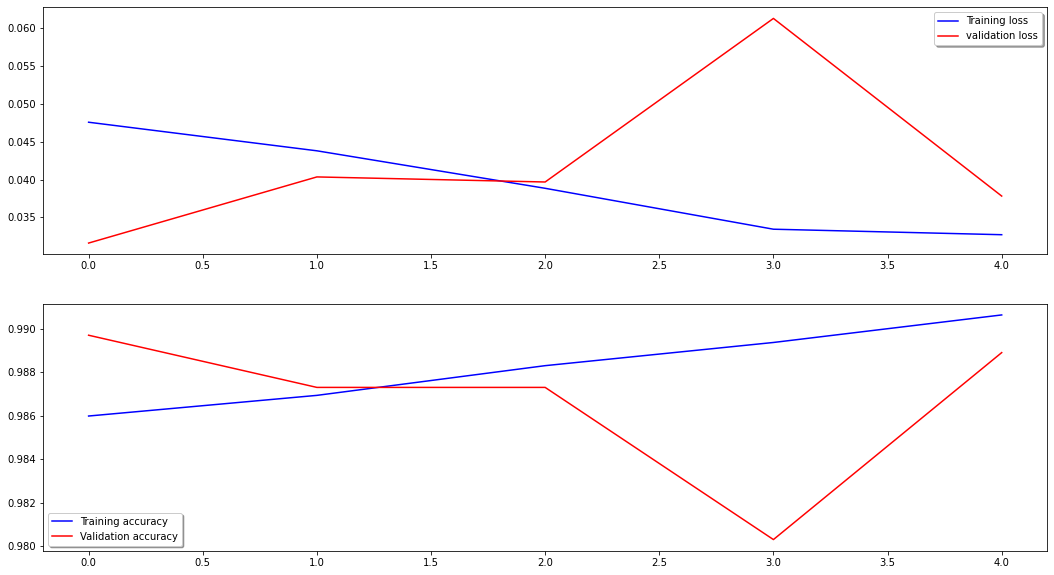

In [26]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1, figsize=(18, 10))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

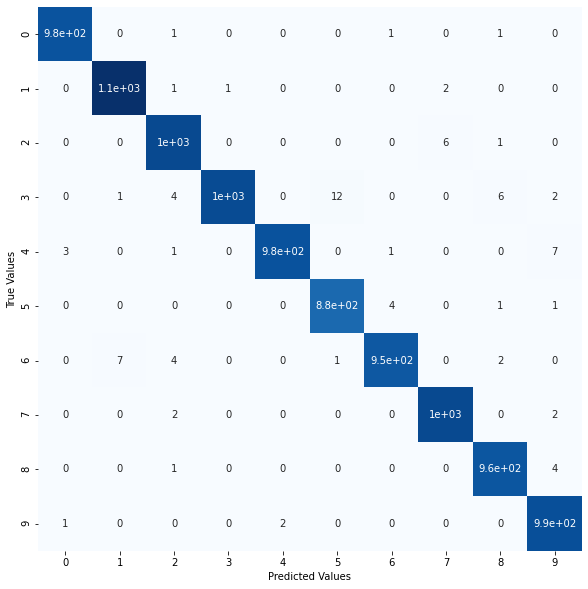

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
fig = plt.figure(figsize=(10, 10)) # Set Figure

y_pred = model.predict(x_test) # Predict encoded label as 2 => [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

Y_pred = np.argmax(y_pred, 1) # Decode Predicted labels
Y_test = np.argmax(y_test, 1) # Decode labels

mat = confusion_matrix(Y_test, Y_pred) # Confusion matrix

# Plot Confusion matrix
sns.heatmap(mat.T, square=True, annot=True, cbar=False, cmap=plt.cm.Blues)
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();

In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)

0.9917